In [237]:
## Importing libraries ##

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib as plt

# Getting the data
import wget

In [112]:
# Getting the data
# wget.download(url='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

# Reading the data using pandas
df = pd.read_csv('data.csv')

Initial inspection of the data

In [113]:
# Initial inspection of the data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [114]:
# Datatypes
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [115]:
# Missing values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Things to note:
- Inconsistent string formatting
- Inconsistent series titling
- Data is ordered
- Data can be seperated into numerical and non-numerical quantities
- Some categories are multiple choice (offer boolean series replacements)
- Missing values in 5 series

Cleaning the data

In [116]:
# Formatting series titles
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [117]:
# Formatting string data
for i in df.dtypes[df.dtypes == 'object'].index:
    df[i] = df[i].str.lower().str.replace(' ', '_')

df.select_dtypes('object')

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible
...,...,...,...,...,...,...,...,...
11909,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11910,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11911,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11912,acura,zdx,premium_unleaded_(recommended),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback


Exploring the data

In [118]:
# Understanding the contents of each column
for i in df.columns:
    print(i)
    print('Total number of unique entries: ', df[i].nunique())
    print('Preview of unique entries: ', df[i].unique()[:5])
    print()

make
Total number of unique entries:  48
Preview of unique entries:  ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
Total number of unique entries:  914
Preview of unique entries:  ['1_series_m' '1_series' '100' '124_spider' '190-class']

year
Total number of unique entries:  28
Preview of unique entries:  [2011 2012 2013 1992 1993]

engine_fuel_type
Total number of unique entries:  10
Preview of unique entries:  ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
Total number of unique entries:  356
Preview of unique entries:  [335. 300. 230. 320. 172.]

engine_cylinders
Total number of unique entries:  9
Preview of unique entries:  [ 6.  4.  5.  8. 12.]

transmission_type
Total number of unique entries:  5
Preview of unique entries:  ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
Total number of unique entries:  4
Preview of unique entries:  ['rear_wheel_drive' 

[Text(0.5, 0, 'MSRP'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'MSRP Histogram')]

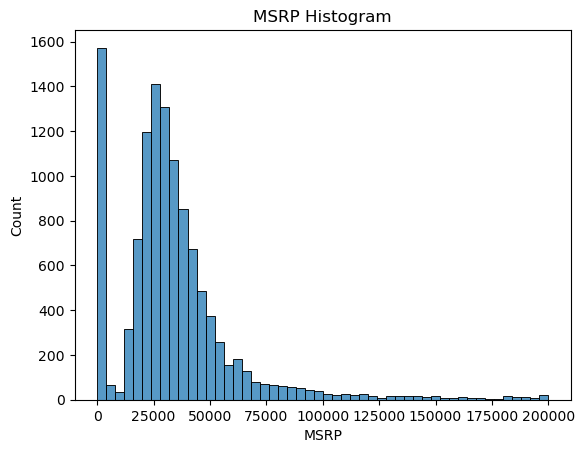

In [119]:
# Visualising series with large amounts of unique values
msrp_hist_plot = sns.histplot(df.msrp, bins=50, binrange=[0, 2e5])
msrp_hist_plot.set(xlabel='MSRP', ylabel='Count', title='MSRP Histogram')

Skewed / Long tailed distributions are not ideal for training models

[Text(0.5, 0, 'MSRP'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'MSRP Histogram')]

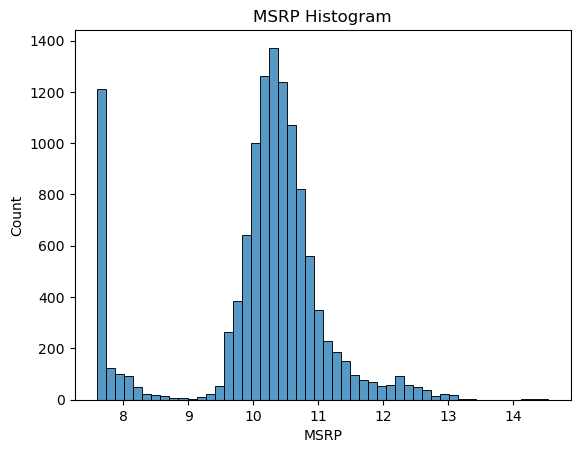

In [120]:
# Converting to logarithmic distribution to better represent the data
msrp_hist_plot_log = sns.histplot(np.log1p(df.msrp), bins=50)
msrp_hist_plot_log.set(xlabel='MSRP', ylabel='Count', title='MSRP Histogram')

Initialising a validation framework

In [121]:
# Shuffling the data
row, col = df.shape
n = np.arange(row)
np.random.shuffle(n)

In [122]:
# Compartmentalising dataset 60/20/20
train = df.iloc[n[:np.int64(len(n)*0.6)]].reset_index(drop='True')
val   = df.iloc[n[np.int64(len(n)*0.6):np.int64(len(n)*0.8)]].reset_index(drop='True')
test  = df.iloc[n[np.int64(len(n)*0.8):]].reset_index(drop='True')

In [123]:
# Creating target vectors and dropping from datasets to form feature matrices
y_train = np.log1p(train.msrp.to_numpy())
y_val   = np.log1p(val.msrp.to_numpy())
y_test  = np.log1p(test.msrp.to_numpy())

del train['msrp']
del val['msrp']
del test['msrp']

In [179]:
# function to prepare feature matrix
def prepare_X(df):
    df = df.copy()

    num_col = np.array(['engine_hp', 'engine_cylinders',
       'highway_mpg', 'city_mpg', 'popularity'])

    cat_col = np.array(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size',
       'vehicle_style', 'number_of_doors'])
    
    df['age'] = df['year'].max() - df['year']
    
    del df['year']

    for i in num_col:
        df[i] = df[i].fillna(0)
    
    categories = {}

    for i in cat_col:
       categories[i] = list(df[i].value_counts().head().index)

    for series, values in categories.items():
       for value in values:
          df['%s_%s' % (series, value)] = (df[series] == value).astype('int')

    for i in cat_col:
       del df[i]

   #  df = df.fillna(0)
    X = df

    return X 

In [187]:
# Preparing feature matrices
X_train = prepare_X(train)
X_val = prepare_X(val)
X_test = prepare_X(test)

In [195]:
# Function to perform linear regression
def linear_regression(X, y, r):
    # First append column of 1s to the front, accounting for w0
    X = np.column_stack([np.ones(X.shape[0]),X])

    # Finding w (Xw = y)
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])    # Regularization step

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [205]:
# Finding weights using linear regression
w0, w1 = linear_regression(X_train, y_train, 0.01)

In [197]:
# Function for calculating the Random Mean Squared Error
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [207]:
# Predicting y and RMSE
y_pred_train = w0 + X_train.dot(w1)
rmse(y_train, y_pred_train)

0.4473174215840204

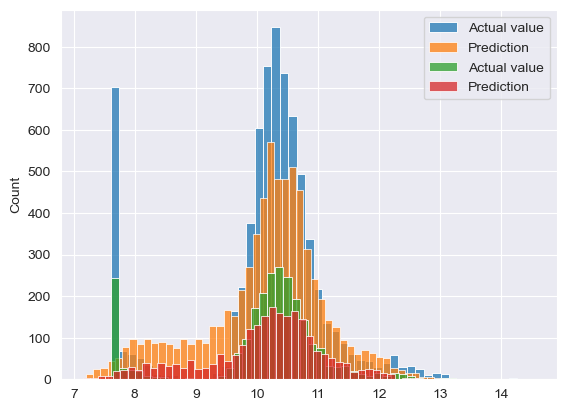

In [245]:
# Plotting results of initial training
sns.set_style("darkgrid")

sns.histplot(y_train, bins=50, label="Actual value")
sns.histplot(y_pred_train, bins=50, label="Prediction")

plt.pyplot.legend() 
plt.pyplot.show()

Now, utilise the validation dataset to check for overfitting

In [268]:
# Evaluating validation dataset fit
y_pred_val = w0 + X_val.dot(w1)
rmse(y_val, y_pred_val)

0.46894973232550186

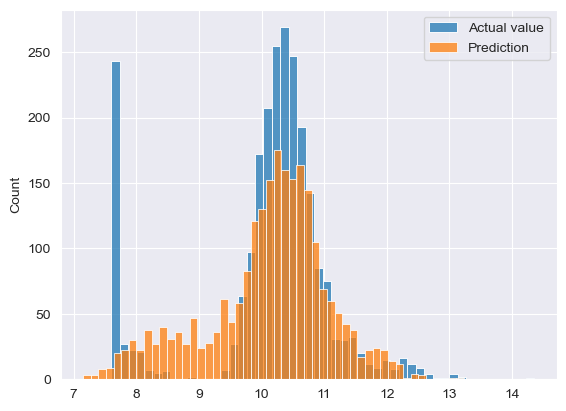

In [253]:
# Plotting results of training on validation set
sns.set_style("darkgrid")

sns.histplot(y_val, bins=50, label="Actual value")
sns.histplot(y_pred_val, bins=50, label="Prediction")

plt.pyplot.legend() 
plt.pyplot.show()

In [269]:
# Comparing RMSE
print("Training RMSE:  {0:>20}".format(rmse(y_train, y_pred_train)))
print("Validation RMSE: {0:>20}".format(rmse(y_val, y_pred_val)))

Training RMSE:    0.4473174215840204
Validation RMSE:  0.46894973232550186


Combining the train and validation datasets, we can re-train our model and evaluate on the test dataset

In [284]:
# Preparing extended feature matric and target vector
train_val = pd.concat([train,val])
y_train_val = np.concatenate([y_train, y_val])

X_train_val = prepare_X(train_val)

In [274]:
# Finding weights for extended dataset using linear regression
w0_tv, w1_tv = linear_regression(X_train_val, y_train_val, 0.01)

In [283]:
# Calculating y predictions on test set and RMSE
y_pred_test = w0_tv + X_test.dot(w1_tv)
rmse(y_test, y_pred_test)

0.4644911305898529

In [281]:
# Once more comparing RMSE
print("- Training RMSE:   {0:>20}".format(rmse(y_train, y_pred_train)))
print("- Validation RMSE: {0:>21}".format(rmse(y_val, y_pred_val)))
print("- Test RMSE:       {0:>20}".format(rmse(y_test, y_pred_test)))

- Training RMSE:     0.4473174215840204
- Validation RMSE:   0.46894973232550186
- Test RMSE:         0.4644911305898529


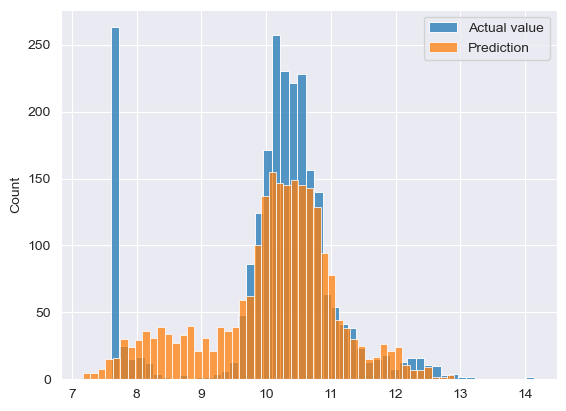

In [282]:
# Plotting results of training on validation set
sns.set_style("darkgrid")

sns.histplot(y_test, bins=50, label="Actual value")
sns.histplot(y_pred_test, bins=50, label="Prediction")

plt.pyplot.legend() 
plt.pyplot.show()

With RMSE being consistent across the three sets we can now use the model to predict the prices of cars from the test dataset

In [524]:
n = (np.random.default_rng().integers(100))
print(test.iloc[n])
print("Predicted Price: {0:>12}".format(np.int64(np.expm1(y_pred_test[n]))))
print("Actual Price: {0:>15}".format(np.int64(np.expm1(y_test[n]))))

make                           hyundai
model                    elantra_coupe
year                              2013
engine_fuel_type      regular_unleaded
engine_hp                        148.0
engine_cylinders                   4.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    2.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    coupe
highway_mpg                         37
city_mpg                            27
popularity                        1439
Name: 72, dtype: object
Predicted Price:        22226
Actual Price:           20895
